In [1]:
import fcwt
import numpy as np
import librosa
import matplotlib.pyplot as plt
import soundfile as sf
from scipy.signal import freqz
from invertiblewavelets import Morlet, DyadicFilterBank, Transform
import time

In [2]:
signal, fs = librosa.load(librosa.ex('trumpet'))

In [3]:
"fcwt"
f0 = 10  # lowest frequency
f1 = 20000  # highest frequency
fn = 1000  # number of frequencies
start = time.time()
freqs, out = fcwt.cwt(signal, fs, f0, f1, fn)
new_signal = np.real(out).sum(axis=0)
end = time.time()
print("fCWT time: ", end - start)

"InvertibleWavelets"
fb = DyadicFilterBank(wavelet=Morlet(1,20) , fs=fs, N=5000, real=True, s_max = 1/10, dj = 1/16)
tf = Transform(fb.Wfreq)

"Long path"
start = time.time()
c = tf.forward(signal, mode='full')
r = tf.inverse(c, mode='full', Lx = signal.shape[0])
end = time.time()
print("InvertibleWavelets time: ", end - start)

fCWT time:  2.881568670272827
InvertibleWavelets time:  1.5882394313812256


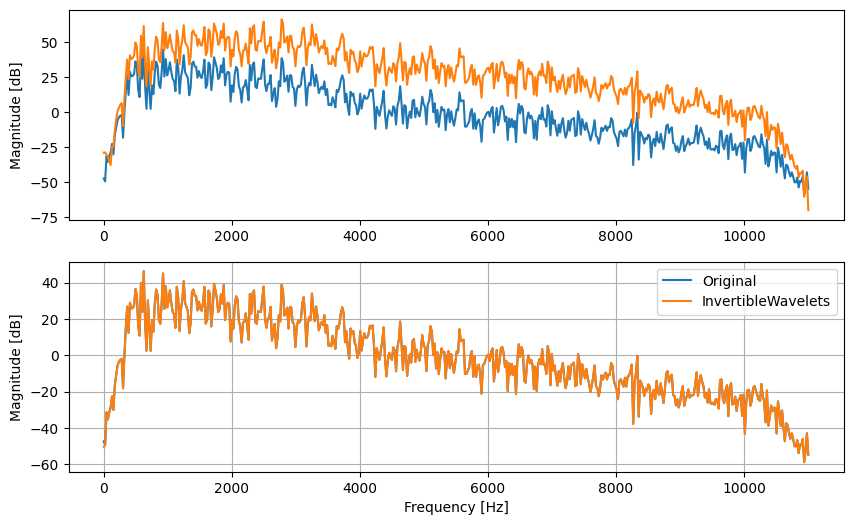

In [8]:
# Analyze the frequency response
w, h_orig = freqz(signal)
_, h_recon = freqz(new_signal)
_, h_recon2 = freqz(r)

# Calculate frequency responses and plot them
w_normalized = w / np.pi * (fs / 2)  # Convert to Hz

fig, ax = plt.subplots(2,1, figsize = (10,6))
ax[0].plot(w_normalized, 20 * np.log10(np.abs(h_orig)), label="Original")
ax[0].plot(w_normalized, 20 * np.log10(np.abs(h_recon)), label="FCWT")
ax[1].plot(w_normalized, 20 * np.log10(np.abs(h_orig)), label="Original")
ax[1].plot(w_normalized, 20 * np.log10(np.abs(h_recon2)), label="InvertibleWavelets")


ax[1].set_xlabel("Frequency [Hz]")
ax[0].set_ylabel("Magnitude [dB]")
ax[1].set_ylabel("Magnitude [dB]")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from IPython.display import Audio
"Original Signal"
Audio(data=signal, rate=fs)

In [ ]:
"FCWT Reconstruction"
Audio(data=new_signal, rate=fs)

In [ ]:
"Invertible Wavelets Reconstruction"
Audio(data=r, rate=fs)

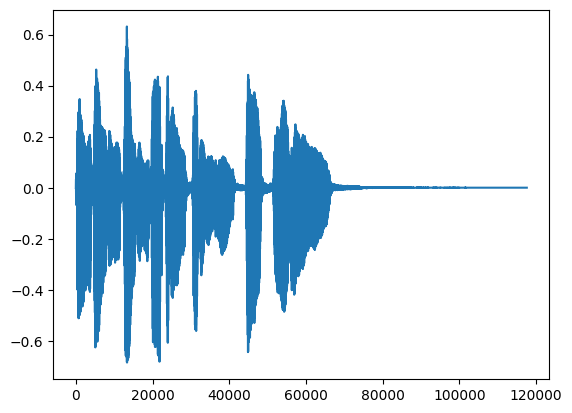

In [48]:
plt.plot(signal)

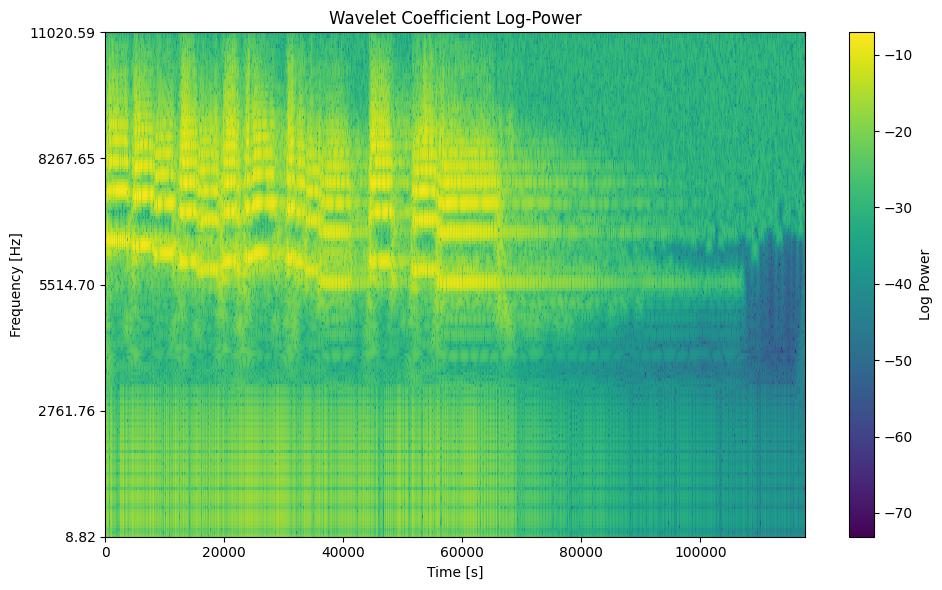

In [9]:
c = tf.forward(signal, mode='same')
tf.scalogram(c, fb.channel_freqs)